# EE 524 Machine Learning Lab: Project

- by Aikendrajit Roll no.: 206102002

**Title:** Default payment using credit card in Taiwan, case study 2016

Dataset source: UCI repository

Algorithm used: Logistic Regression, KNN and ANN

**Attribute Information**:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [68]:
#Load the data

In [310]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [311]:
data = pd.read_csv("DefaultCreditCard.csv")
data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [312]:
data.keys()

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [313]:
data.shape

(30000, 25)

In [314]:
data.rename(columns={"default payment next month": "default"}, inplace=True)
data.drop('ID', axis = 1, inplace =True) # drop column "ID"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [316]:
# separating features and target
y = data.default
features = data.drop('default', axis = 1, inplace = False)

For Gender, the attributes described in UCI repo is:

* 1 = male
* 2 = female

In [317]:
# finding unique elements of Gender
data['SEX'].unique()

array([2, 1], dtype=int64)

In [318]:
# we get two unique elements 1 and 2 for gender: male = 1 & female = 2, so we don't need to make any changes

For education, the attributes described in UCI repo is:

* 1 = graduate school
* 2 = university
* 3 = high school
* 4 = others

In [319]:
# finding unique elements of Marriage
data['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [320]:
# since the unique elements for education is different from the attributes described by UCI repo, we need to group the
# exceeding elements into 4, which is others category.

In [321]:
data['EDUCATION'] = np.where(data['EDUCATION'] == 0, 4, data['EDUCATION'])
data['EDUCATION'] = np.where(data['EDUCATION'] == 5, 4, data['EDUCATION'])
data['EDUCATION'] = np.where(data['EDUCATION'] == 6, 4, data['EDUCATION'])

In [322]:
# now let us check again how many unique elements of Education are there

data['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

In [323]:
# as there are 4 unique elements of Education, we don't need to group or separate them

For Marital Status, the attributes described in UCI repo is:

* 1 = married
* 2 = single
* 3 = others

In [324]:
# finding unique elements of Marriage
data['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [325]:
# we see that there exist element 0. Let us group this into element 3 which is others category

In [326]:
data['MARRIAGE'] = np.where(data['MARRIAGE'] == 0, 3, data['MARRIAGE'])

In [327]:
data['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

* Describing the data:

In [328]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.842267,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.744494,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


* Categorizing the data into default or non-default

In [335]:
#frequency of defaults:

yes = data.default.sum()
no = len(data) - yes

Text(0.5, 1.0, 'default vs non-default')

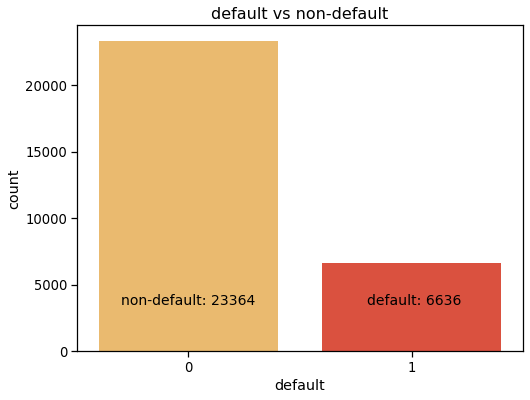

In [348]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot('default', data=data, palette="YlOrRd")

plt.annotate('default: {}'.format(yes), xy=(0.8, 15000), xytext=(0.8, 3500), size=14)
plt.annotate('non-default: {}'.format(no), xy=(-0.2, 15000), xytext=(-0.3, 3500), size=14)

plt.title('default vs non-default', size=16)

In [349]:
# finding the percentage of defaulters & non-defaulters

default_percent = (yes/len(data)) * 100
print("Percentage of default credit payments made:", default_percent)

non_default_percent = (no/len(data)) * 100
print("\nPercentage of non default credit payments made:", non_default_percent)

Percentage of default credit payments made: 22.12

Percentage of non default credit payments made: 77.88000000000001


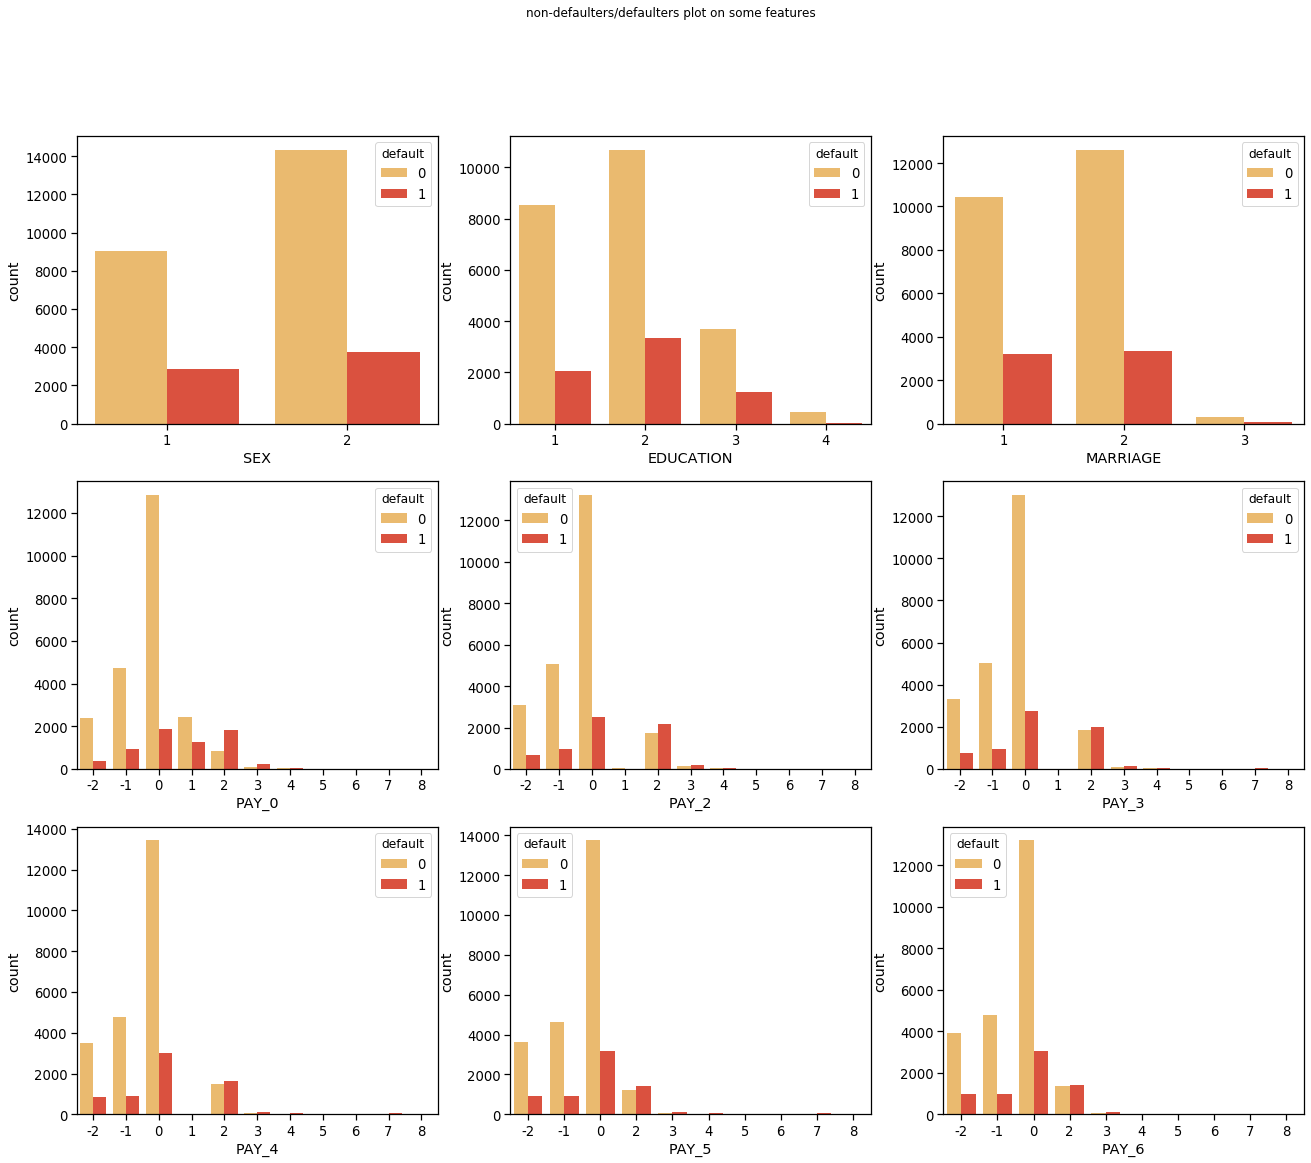

In [379]:
subset = data[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default']]
f, axes = plt.subplots(3, 3, figsize = (22, 18))
f.suptitle('non-defaulters/defaulters plot on some features')

ax1 = sns.countplot(x = 'SEX', hue = 'default', data = subset, palette = 'YlOrRd', ax = axes[0,0])
ax2 = sns.countplot(x = 'EDUCATION', hue = 'default', data = subset, palette = 'YlOrRd', ax = axes[0,1])
ax3 = sns.countplot(x = 'MARRIAGE', hue = 'default', data = subset, palette = 'YlOrRd', ax = axes[0,2])
ax4 = sns.countplot(x = 'PAY_0', hue = 'default', data = subset, palette = 'YlOrRd', ax = axes[1,0])
ax5 = sns.countplot(x = 'PAY_2', hue = 'default', data = subset, palette = 'YlOrRd', ax = axes[1,1])
ax6 = sns.countplot(x = 'PAY_3', hue = 'default', data = subset, palette = 'YlOrRd', ax = axes[1,2])
ax7 = sns.countplot(x = 'PAY_4', hue = 'default', data = subset, palette = 'YlOrRd', ax = axes[2,0])
ax8 = sns.countplot(x = 'PAY_5', hue = 'default', data = subset, palette = 'YlOrRd', ax = axes[2,1])
ax9 = sns.countplot(x = 'PAY_6', hue = 'default', data = subset, palette = 'YlOrRd', ax = axes[2,2]);

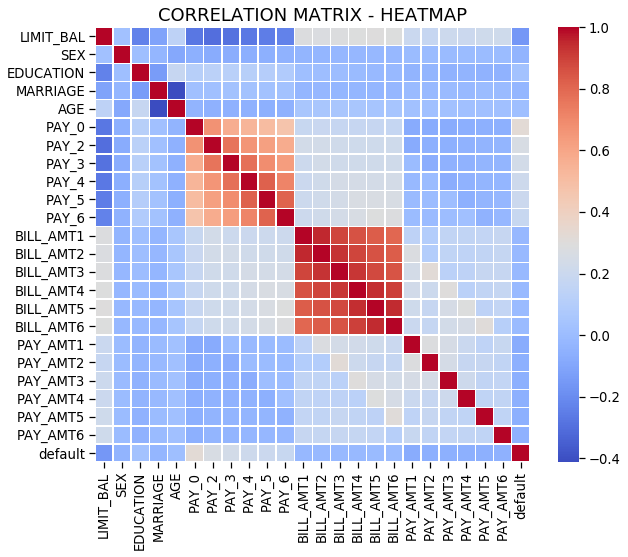

In [386]:
#  looking at correlations matrix, defined via Pearson function  
corr = data.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

**Logistic Regression** from scratch